In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import powerlaw
import pandas as pd
import gzip

In [ ]:
def power_law(N,dim,alpha_a,alpha_g):
    path_r = f"../../build/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}"
    isExist = os.path.exists(path_r)
    if(isExist==False):
        print("doesn't exist folder")
    all_files = glob.glob(os.path.join(path_r,"*.csv.gz"))
    lst_aux = []

    for file in all_files:
        train = pd.read_csv(file,sep=",")
        lst_aux.append(train["'r'"])
        
    frame = pd.concat(lst_aux,ignore_index=True)
    r_all = frame.values
    return r_all

In [2]:
def distribution(degree):
    hist, bins_edge = np.histogram(degree, bins=np.arange(0.5,10**4+1.5,1), density=True)
    
    P = hist*np.diff(bins_edge)             # distribution = density*deltaK
    K = bins_edge[:-1]+bins_edge[:1]
    index_remove = []                       # load index with distribution zero
    
    for idk,elements in enumerate(P):
        if(elements==0):
            index_remove.append(idk) 
    # Removing elements in k_mean and distribution with distribution = 0 (empty box)
    p_real = np.delete(P,index_remove)      
    k_real = np.delete(K,index_remove)
    return k_real,p_real

In [13]:
def gml_reader(N, dim, alpha_a, alpha_g, cod_file):
	path = f"../../data/test_r_powerlaw/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/gml/" 
	isExist = os.path.exists(path)
	if(isExist!=True):
		return "doesn't exist", "gml_folder"
	File = f"gml_{cod_file}.gml.gz"


	file_directory = path + File

	node = {"id": [],
		"position":[],
		"degree": []}
	edge = {"connections": [],
		  "distance": []}
	with gzip.open(file_directory) as file_in:
		String = file_in.readlines()
		Lines = [i.decode('utf-8') for i in String]
		for i in range(len(Lines)):
			if(Lines[i]=='node\n'):
				node["id"].append(int(Lines[i+2][4:-2]))
				node["position"].append([float(Lines[i+6][2:-1]),float(Lines[i+7][2:-1]),float(Lines[i+8][2:-1]),float(Lines[i+9][2:-1])])
				node["degree"].append(int(Lines[i+9][7:-1]))
			elif(Lines[i]=="edge\n"):
				edge["connections"].append([int(Lines[i+2][8:-2]),int(Lines[i+3][8:-2])])
				edge["distance"].append(float(Lines[i+4][9:-1]))
	return node, edge

In [11]:
N = 10000
cods = [1633334746,1066967560,505987717,2117925522]

In [12]:
node1,edge1 = gml_reader(N,1,1.0,1.0,cods[0])
node2,edge2 = gml_reader(N,2,1.0,1.0,cods[1])
node3,edge3 = gml_reader(N,3,1.0,1.0,cods[2])

In [14]:
node4,edge4 = gml_reader(N,4,1.0,1.0,cods[3])

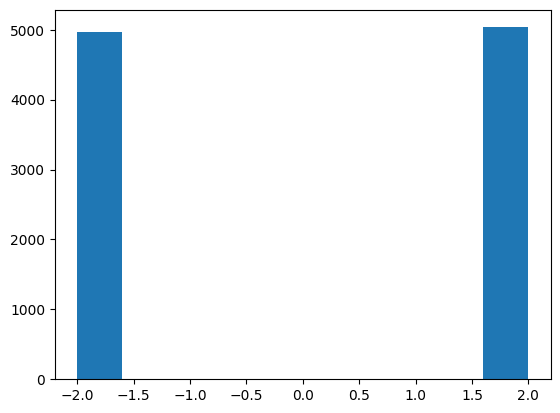

In [24]:
# D = 1, Radius = 2
histo = [node1["position"][i][0] for i in range(len(node1["position"]))]
plt.hist(histo)
plt.show()

In [33]:
# D = 2, Radius = 2
for i in range(1,len(node2["position"])):
    L = node2["position"][i]
    #print(np.sqrt(sum(j**2 for j in L)))

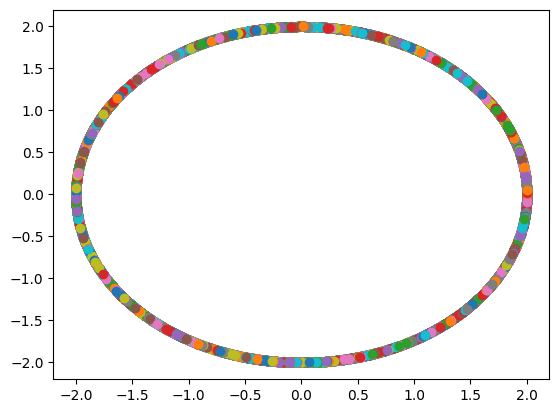

In [34]:
for i in range(1,len(node2["position"])):
    plt.plot(node2["position"][i][0],node2["position"][i][1],'o')
plt.show()

In [38]:
# D = 3, Radius = 2
for i in range(1,len(node3["position"])):
    L = node3["position"][i]
    #print(np.sqrt(sum(j**2 for j in L)))

In [42]:
x = [node3["position"][i][0] for i in range(1,len(node3["position"]))]
y = [node3["position"][i][1] for i in range(1,len(node3["position"]))]
z = [node3["position"][i][2] for i in range(1,len(node3["position"]))]

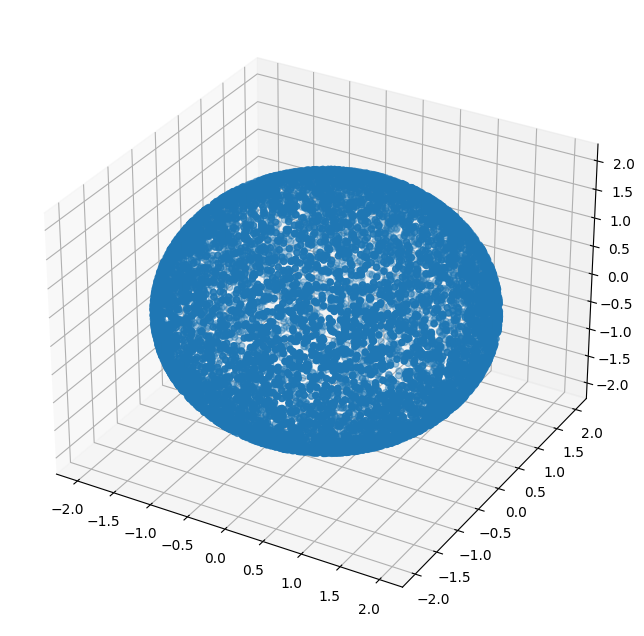

In [46]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
plt.show()

In [37]:
# D = 4, Radius = 2
for i in range(1,len(node4["position"])):
    L = node4["position"][i]
    print(np.sqrt(sum(j**2 for j in L)))

2.0000005998241597
1.9999996214972142
2.0000001713627427
2.000000061696249
2.000000328140473
2.0000001041424973
2.0000005649861703
1.9999995362886962
2.0000002406609854
1.9999995676274533
2.0000004037207093
2.0000005299824295
1.99999971820598
2.0000002054257395
2.0000003554112182
2.000000390494462
1.9999998374564933
2.0000000757074985
1.9999998985262475
1.9999997386927328
1.9999996737594734
2.000000389236712
1.9999999698655
1.9999998960312473
1.9999999568787497
1.9999999289804986
2.0000003138052254
2.000000442120451
2.0000001156502467
2.000000245697235
1.9999997129239793
2.0000001507602443
1.9999996249517147
2.000000259771733
2.0000004801674423
2.0000000894764978
1.999999934408749
2.0000003064247265
2.0000002575952336
2.0000003592249675
1.999999383169405
1.9999998383487436
2.0000001002477474
1.9999997653264863
1.9999997316457319
1.9999995857414572
1.999999979743
2.0000002875337293
1.999999501210688
2.00000001752875
1.9999998851837468
1.999999834339243
2.000000261381233
2.00000027387073

In [ ]:
N = 9*10**4
alpha_a = 2.0
alpha_g = [1.0,2.0,3.0,4.0]
data_r_1 = [[] for x in range(len(alpha_g))]
data_r_2 = [[] for x in range(len(alpha_g))]
data_r_3 = [[] for x in range(len(alpha_g))]
data_r_4 = [[] for x in range(len(alpha_g))]

In [ ]:
for i in range(len(alpha_g)):
    data_r_1[i] = power_law(N,1,alpha_a,alpha_g[i])
    data_r_2[i] = power_law(N,2,alpha_a,alpha_g[i])
    data_r_3[i] = power_law(N,3,alpha_a,alpha_g[i])
    data_r_4[i] = power_law(N,4,alpha_a,alpha_g[i])

In [ ]:
data_1 = {}
data_2 = {}
data_3 = {}
data_4 = {}

for i in range(len(alpha_g)):
    data_1[f"alpha_g_{alpha_g[i]}"] = data_r_1[i]
    data_2[f"alpha_g_{alpha_g[i]}"] = data_r_2[i]
    data_3[f"alpha_g_{alpha_g[i]}"] = data_r_3[i]
    data_4[f"alpha_g_{alpha_g[i]}"] = data_r_4[i]

In [ ]:
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df3 = pd.DataFrame(data_3)
df4 = pd.DataFrame(data_4)

In [ ]:
df1.to_csv(f"../../build/N_{N}/dim_{1}/r_all.csv",index=False)
df2.to_csv(f"../../build/N_{N}/dim_{2}/r_all.csv",index=False)
df3.to_csv(f"../../build/N_{N}/dim_{3}/r_all.csv",index=False)
df4.to_csv(f"../../build/N_{N}/dim_{4}/r_all.csv",index=False)

In [3]:
N = 9*10**4
df1 = pd.read_csv(f"../../build/N_{N}/dim_{1}/r_all.csv")
df2 = pd.read_csv(f"../../build/N_{N}/dim_{2}/r_all.csv")
df3 = pd.read_csv(f"../../build/N_{N}/dim_{3}/r_all.csv")
df4 = pd.read_csv(f"../../build/N_{N}/dim_{4}/r_all.csv")

In [12]:
alpha_g = 1.0
r_all = df1[f"alpha_g_{alpha_g}"].values
k, pk = distribution(r_all)
k,pk
#distribution(degree)
#k1, pk1 = 

(array([1.000e+00, 2.000e+00, 3.000e+00, ..., 9.918e+03, 9.929e+03,
        9.939e+03]),
 array([3.33392508e-01, 2.66711262e-01, 1.14124482e-01, ...,
        1.37188965e-07, 1.37188965e-07, 1.37188965e-07]))

In [32]:
def power_comparation(N,dim,alpha_g,cod_file):
    t = pd.read_csv(f"/home/junior/Documents/codes/TsallisND/build/N_{N}/dim_{dim}/alpha_a_2.0_alpha_g_{alpha_g}/{cod_file}")
    my_t = t["'r'"].values
    results = powerlaw.Fit(my_t)
    diff = abs(float(results.power_law.alpha)-(alpha_g+dim))
    return diff

In [34]:
N = 9*10**4
alpha_g = [1.0,2.0,3.0,4.0]

cod_1d = ["r_14818536.csv.gz","r_11017166.csv.gz","r_95175042.csv.gz","r_112011149.csv.gz"]
cod_2d = ["r_24994847.csv.gz","r_21921539.csv.gz","r_57919712.csv.gz","r_7400698.csv.gz"]
cod_3d = ["r_1280711.csv.gz","r_16183895.csv.gz","r_6176386.csv.gz","r_23179434.csv.gz"]
cod_4d = ["r_24778910.csv.gz","r_6027203.csv.gz","r_13848852.csv.gz","r_6972959.csv.gz"]

dif_1d = []
dif_2d = []
dif_3d = []
dif_4d = []

for i in range(len(alpha_g)):
    dif_1d.append(power_comparation(N,1,alpha_g[i],cod_1d[i]))
    dif_2d.append(power_comparation(N,2,alpha_g[i],cod_2d[i]))
    dif_3d.append(power_comparation(N,3,alpha_g[i],cod_3d[i]))
    dif_4d.append(power_comparation(N,4,alpha_g[i],cod_4d[i]))

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [35]:
dif_1d,dif_2d,dif_3d,dif_4d

([0.0031800433103592596,
  0.0007160226307920681,
  0.0066712106516853,
  0.02528988762678086],
 [0.006050638275457931,
  0.0036727219231220687,
  0.006707875858053214,
  0.02737410488009573],
 [0.003003473179506333,
  0.011316463442189395,
  0.011283407692905811,
  0.0202976741926566],
 [0.03477505805183245,
  0.03611300396542738,
  0.01381383000362657,
  0.03595350350732751])

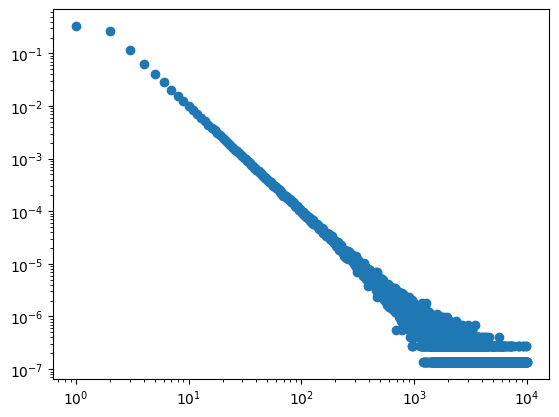

In [15]:
plt.plot(k,pk,'o')
plt.xscale("log")
plt.yscale("log")
plt.show()